In [1]:
%matplotlib inline
import gzip, os
import numpy as np
import matplotlib.pyplot as plt
import time
from urllib.request import urlretrieve

In [2]:
# Function that downloads a specified MNIST data file from Yann Le Cun's website
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# Invokes download() if necessary, then reads in images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784)
    return data

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [3]:
## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the testing set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

train_data = train_data.astype('int32')
test_data = test_data.astype('int32')

In [4]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (60000, 784)
Number of training labels:  60000
Testing dataset dimensions:  (10000, 784)
Number of testing labels:  10000


In [5]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))

Training set distribution:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test set distribution:
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


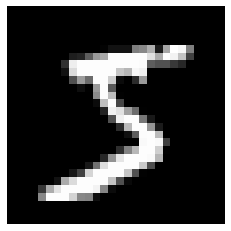

Label 5


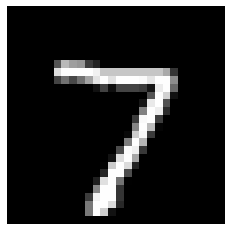

Label 7


In [6]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label " + str(label))
    return

## View the first data point in the training set
vis_image(0, "train")

## Now view the first data point in the test set
vis_image(0, "test")

In [7]:
from sklearn.model_selection import train_test_split
trainx, valx, trainy, valy = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)


In [8]:
def L2distance(x,y):
    return np.sum(np.square(x-y))

def nearestNeighbor(x,trainx,trainy): 
    distance = [L2distance(x,trainx[i,]) for i in range (len(trainy))]
    label = trainy[np.argmin(distance)] 
    return label

def NN_L2(trainx, trainy, evalx):
    result = []
    for i in range(len(evalx)):
        result.append(nearestNeighbor(evalx[i],trainx,trainy))
    
    return result
  

values = NN_L2(trainx, trainy, valx)

In [ ]:
import statistics 
from statistics import mode 

def KnearestNeighbor(x,trainx,trainy,k): 
    distance = [L2distance(x,trainx[i,]) for i in range (len(trainy))]
    Neighbors = np.argpartition(distance,k)
    NeighborsLabels = []
   
    for c in range(k):
      NeighborsLabels.append(trainy[Neighbors[c]])

    return votes(NeighborsLabels)

def votes(Neighbors):
    counter = 0
    num = Neighbors[0] 
      
    for i in Neighbors: 
        curr_frequency = Neighbors.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
            
    return num 
  
 

def KNN_L2(trainx, trainy, evalx, K):
    results = []
    for i in range(len(evalx)):
        results.append(KnearestNeighbor(evalx[i],trainx,trainy,K))
    
    return results
  
print("start")
values2 = KNN_L2(trainx,trainy,valx,5)
print("end")

start


In [ ]:
def L1distance(x,y):
  return np.linalg.norm(x - y, ord=1)


def nearestNeighborL1(x,trainx,trainy): 
    distance = [L1distance(x,trainx[i,]) for i in range (len(trainy))]
    label = trainy[np.argmin(distance)] 
    return label
  
def NN_L1(trainx, trainy, evalx):
    result = []
    for i in range(len(evalx)):
        result.append(nearestNeighborL1(evalx[i],trainx,trainy))
    
    return result
  
print("start")
values3 = NN_L1(trainx, trainy, valx)
print("end")

In [ ]:
def KnearestNeighborL1(x,trainx,trainy,k): 
    distance = [L1distance(x,trainx[i,]) for i in range (len(trainy))]
    Neighbors = np.argpartition(distance,k)
    NeighborsLabels = []
   
    for c in range(k):
      NeighborsLabels.append(trainy[Neighbors[c]])

    return votesL1(NeighborsLabels)

def votesL1(Neighbors):
    counter = 0
    num = Neighbors[0] 
      
    for i in Neighbors: 
        curr_frequency = Neighbors.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
            
    return num 
  
 

def KNN_L1(trainx, trainy, evalx, K):
    results = []
    for i in range(len(evalx)):
        results.append(KnearestNeighborL1(evalx[i],trainx,trainy,K))
    
    return results
  
print("start")
values4 = KNN_L1(trainx,trainy,valx,5)
print("end")

In [ ]:
def KNN(trainx, trainy, evalx, K, dist_metric):
    if dist_metric == 2:
        return KNN_L2(trainx, trainy, evalx, K)
    else:
        return KNN_L1(trainx, trainy, evalx, K)

In [ ]:
print("choose a K value...")
K_value = input()
print("type 1 for manhattan distance mitric and 2 for euclidean distance metric...")
dist_metric = input()

print("satrt")
values5 = KNN(trainx, trainy, valx, int(K_value), int(dist_metric))
print("end")

In [ ]:
from sklearn.metrics import confusion_matrix
results = []
errorRate = np.array(results)
errorRate = confusion_matrix(valy, values5)
print(errorRate)

In [ ]:
vis_image(0,"trainx")
print(trainy[0])

In [ ]:

error_rate = np.mean(values != valy)
print(error_rate)

error_rate1 = np.mean(valy != values2)
print(error_rate1)

error_rate2 = np.mean(valy != values3)
print(error_rate2)

error_rate3 = np.mean(valy != values4)
print(error_rate3)
